In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import umap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [30]:


# Read the graph data from the file
with open('road-euroroad.edges', 'r') as file:
    edges = [line.strip().split() for line in file]

# Create a graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

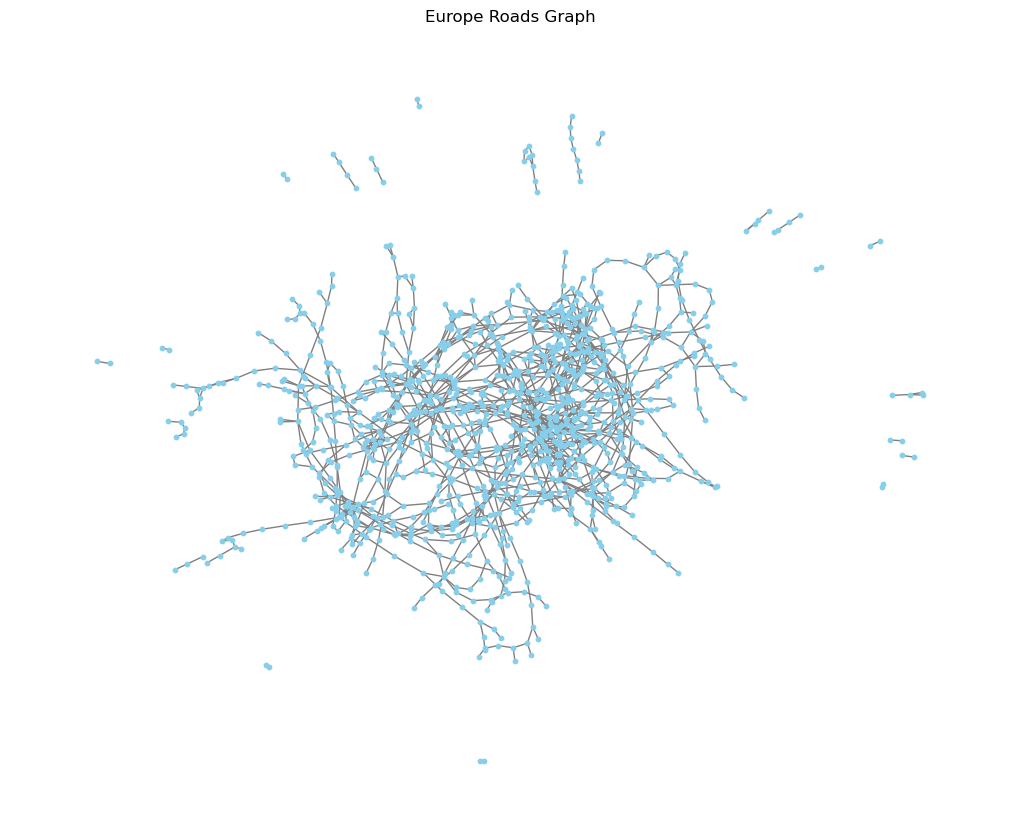

In [31]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G , seed=42)  # Set a seed for reproducibility
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray')
plt.title("Europe Roads Graph")
plt.show()

In [32]:
# Convert the graph to an adjacency matrix
adj_matrix = nx.adjacency_matrix(G).toarray()
print(np.shape(adj_matrix))


(1174, 1174)


In [49]:

umap_model = umap.UMAP(min_dist=0.4, n_neighbors=5, n_components=2, metric='euclidean')
embedding = umap_model.fit_transform(adj_matrix)
print(np.shape(embedding))

(1174, 2)


In [50]:
umap_model = umap.UMAP(min_dist=0.4, n_components=3, metric='euclidean')
embedding_3d = umap_model.fit_transform(adj_matrix)
print(np.shape(embedding_3d))

(1174, 3)


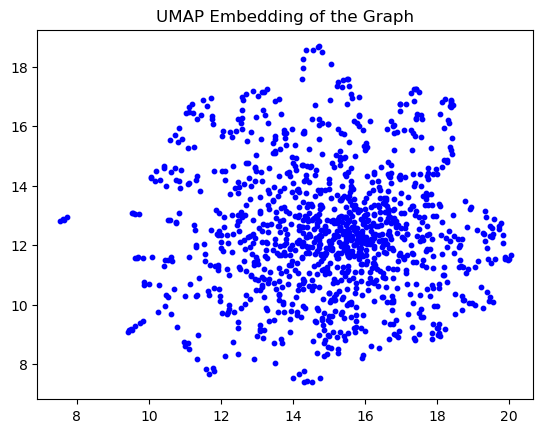

In [51]:
plt.scatter(embedding[:, 0], embedding[:, 1],c='b', s=10)
plt.title("UMAP 2D Embedding of the Graph")
plt.show()

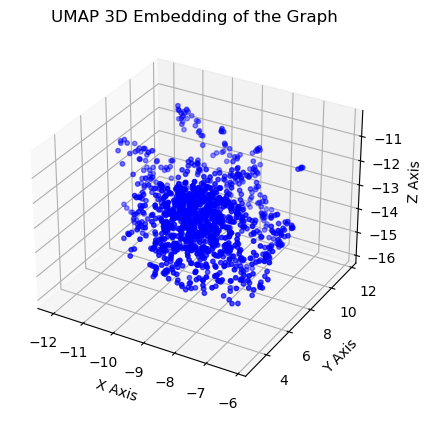

In [53]:



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = embedding_3d[:, 0]
y = embedding_3d[:, 1]
z = embedding_3d[:, 2]


ax.scatter(x, y, z, c='b', marker='o', s=10)  


ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')


plt.title('UMAP 3D Embedding of the Graph')


plt.show()


In [37]:

threshold = 0.5  

# Calculate pairwise distances between embeddings
pairwise_distances = np.linalg.norm(embedding[:, None] - embedding, axis=2)


predicted_links = []
for i in range(len(G.nodes())):
    for j in range(i + 1, len(G.nodes())):
        if pairwise_distances[i, j] < threshold:
            predicted_links.append((i, j))


print("Predicted Links:")
for node1, node2 in predicted_links:
    print(f"Node {node1} and Node {node2}")

Predicted Links:
Node 0 and Node 2
Node 0 and Node 3
Node 0 and Node 5
Node 0 and Node 6
Node 0 and Node 8
Node 0 and Node 47
Node 0 and Node 48
Node 0 and Node 386
Node 0 and Node 606
Node 0 and Node 608
Node 0 and Node 610
Node 0 and Node 702
Node 0 and Node 721
Node 0 and Node 723
Node 0 and Node 833
Node 0 and Node 918
Node 1 and Node 19
Node 1 and Node 23
Node 1 and Node 35
Node 1 and Node 36
Node 1 and Node 37
Node 1 and Node 58
Node 1 and Node 113
Node 1 and Node 115
Node 1 and Node 116
Node 1 and Node 141
Node 1 and Node 143
Node 1 and Node 146
Node 1 and Node 158
Node 1 and Node 162
Node 1 and Node 187
Node 1 and Node 537
Node 1 and Node 636
Node 1 and Node 666
Node 1 and Node 668
Node 1 and Node 686
Node 1 and Node 726
Node 1 and Node 798
Node 1 and Node 830
Node 1 and Node 834
Node 1 and Node 886
Node 1 and Node 888
Node 1 and Node 926
Node 1 and Node 927
Node 1 and Node 1087
Node 1 and Node 1103
Node 1 and Node 1109
Node 1 and Node 1111
Node 1 and Node 1136
Node 1 and Node 